<a href="https://colab.research.google.com/github/bartolomeoadrian/computational-vision/blob/main/07_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Cargar librerías

In [13]:
import requests
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# 2 - Cargar y normalizar imágenes

In [17]:
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

def format_img(image, label):
    image = tf.image.resize(image, (100, 100))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 32
ds_train = ds_train.map(format_img).shuffle(500).batch(batch_size).prefetch(1)
ds_test = ds_test.map(format_img).batch(batch_size).prefetch(1)

# 3 - Definir una red neuronal convolucional

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])

# 4 - Definir una función de pérdida y un optimizador

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# 5 - Entrenar a la red

In [10]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 565ms/step - accuracy: 0.5666 - loss: 1.3165 - val_accuracy: 0.8306 - val_loss: 0.3631
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 75s 497ms/step - accuracy: 0.9937 - loss: 0.0251 - val_accuracy: 0.8091 - val_loss: 0.5913
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 474ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.8145 - val_loss: 0.5511
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 489ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8145 - val_loss: 0.5956
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 494ms/step - accuracy: 1.0000 - loss: 6.5817e-04 - val_accuracy: 0.8118 - val_loss: 0.6268
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 475ms/step - accuracy: 1.0000 - loss: 3.6124e-04 - val_accuracy: 0.8145 - val_loss: 0.6573
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 489ms/step - accuracy: 1.0000 - loss: 2.5115e-04 - val_accuracy: 0.8145 - val_loss: 0.6818
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 488ms/step - accuracy: 1.0000 - loss: 1.417

# 6 - Prueba de la red

In [12]:
loss, acc = model.evaluate(ds_test)
print(f"\nPrecisión en test: {acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8321 - loss: 0.6571

Precisión en test: 0.8118


# 7 - Predicción

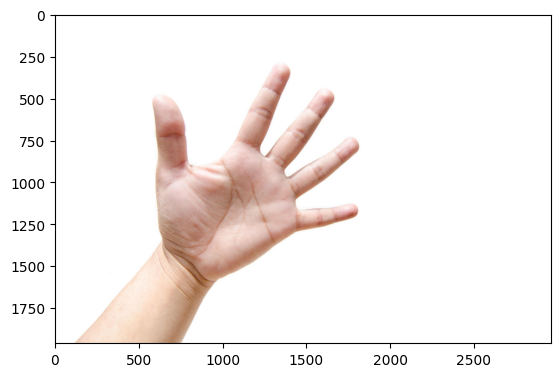

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: paper


In [16]:
class_names = ['rock', 'paper', 'scissors']

image_url = 'https://raw.githubusercontent.com/bartolomeoadrian/computational-vision/refs/heads/main/assets/images/paper.jpg'

# Download the image
response = requests.get(image_url)
with open('paper.jpg', 'wb') as f:
    f.write(response.content)

# Read the image using cv2.imread
img = cv2.imread('paper.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# Resize the image to match the model's expected input shape
img_resized = cv2.resize(img_rgb, (100, 100))

img_array = np.array(img_resized).astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f'Predicción: {class_names[predicted_class]}')